##【問題1】コンペティション内容の確認

コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

・何を学習し、何を予測するのか
・どのようなファイルを作りKaggleに提出するか
・提出されたものはどういった指標値で評価されるのか


・クライアントの返済能力の特徴を学習し、クライアントの返済能力を1 = 支払が困難なクライアント 0 = それ以外
で予測する

・SK_ID_CURR テストセットのそれぞれについて、TARGET変数の確率を予測するファイル

・予測された確率と観測されたターゲットの間のROC曲線の下の領域を評価される


まずは単純な方法による ベースラインモデル　を作成します。精度の基準となるモデルです。


精度を高くする必要はありません。エラーなく実行でき、Kaggle側に推定値を提出できることを目指します。

##【問題2】学習と検証


データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('C:/Users/iwaju/Desktop/Python/application_train.csv')
df_test = pd.read_csv('C:/Users/iwaju/Desktop/Python/application_test.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [23]:
#欠損値パーセント
#10%以上を取得
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data.head(sum(percent > 0.1))

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


In [40]:
corr_matrix = df.corr()

In [43]:
#相関関係
df_cols = pd.DataFrame({"features":corr_matrix.columns,"objective_variable":corr_matrix["TARGET"]},index=None)
df_cols = df_cols.reset_index(drop=True)
df_cols.style.background_gradient()

,features,objective_variable
0,SK_ID_CURR,-0.002108
1,TARGET,1.000000
2,CNT_CHILDREN,0.019187
3,AMT_INCOME_TOTAL,-0.003982
4,AMT_CREDIT,-0.030369
5,AMT_ANNUITY,-0.012817
6,AMT_GOODS_PRICE,-0.039645
7,REGION_POPULATION_RELATIVE,-0.037227
8,DAYS_BIRTH,0.078239
9,DAYS_EMPLOYED,-0.044932


In [62]:
#トップ１０取得

#相関係数の絶対値をとって、閾値と比較する
df_cols = corr_matrix[corr_matrix["TARGET"].abs()>0.04]
top_ten = []
for i in df_cols[:11].index:
    top_ten .append(i)
top_ten .pop()#SalePriceが末尾にあるので削除
print(len(top_ten))
print(top_ten)

10
['TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY']


In [52]:
df_heat = df.loc[:, top_ten].corr()
df_heat

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY
TARGET,1.000000,0.078239,-0.044932,0.041975,0.051457,0.045982,0.058899,0.060893,0.044395,0.050994
DAYS_BIRTH,0.078239,1.000000,-0.615864,0.331912,0.272691,0.619888,0.009361,0.008073,0.180382,0.242401
DAYS_EMPLOYED,-0.044932,-0.615864,1.000000,-0.210242,-0.272378,-0.999755,0.032750,0.034624,-0.090516,-0.254559
DAYS_REGISTRATION,0.041975,0.331912,-0.210242,1.000000,0.101896,0.212361,0.080210,0.074038,0.064334,0.099874
DAYS_ID_PUBLISH,0.051457,0.272691,-0.272378,0.101896,1.000000,0.273611,-0.005103,-0.007737,0.076326,0.099354
FLAG_EMP_PHONE,0.045982,0.619888,-0.999755,0.212361,0.273611,1.000000,-0.032871,-0.034712,0.092166,0.256427
REGION_RATING_CLIENT,0.058899,0.009361,0.032750,0.080210,-0.005103,-0.032871,1.000000,0.950842,0.035741,0.008360
REGION_RATING_CLIENT_W_CITY,0.060893,0.008073,0.034624,0.074038,-0.007737,-0.034712,0.950842,1.000000,0.045669,0.028081
REG_CITY_NOT_LIVE_CITY,0.044395,0.180382,-0.090516,0.064334,0.076326,0.092166,0.035741,0.045669,1.000000,0.440409
REG_CITY_NOT_WORK_CITY,0.050994,0.242401,-0.254559,0.099874,0.099354,0.256427,0.008360,0.028081,0.440409,1.000000


In [164]:
from sklearn.model_selection import train_test_split
#目的変数との相関が高い2つ選択
X = np.array(df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY"]])
y = np.array(df["TARGET"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_test.shape

(92254, 2)

In [165]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(X_train, y_train.ravel())
y_pred = rand.predict_proba(X_test)[:,1]
y_pred

array([0.        , 0.        , 0.        , ..., 0.08013162, 0.00066667,
       0.11031321])

In [166]:
#AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print(f"AUC = {auc:.4}")

AUC = 0.5201


0から1の確率のような値（0.3や0.9など）で予測する場合は、
AUC（Area under the ROC curve）やloglossが多く使われます

AUCは0〜1の値を取り、1になるほど性能の良さを表します。予測結果がランダムの場合は0.5に近い値になります


引用https://employment.en-japan.com/engineerhub/entry/2019/09/10/103000

In [167]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5200665464124979

##【問題3】テストデータに対する推定

テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

In [183]:
testX = np.array(df_test[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY"]])

In [184]:
test_pred = rand.predict_proba(testX)[:,1]


In [185]:
#数確認
test_pred.shape

(48744,)

In [186]:
#数確認
test_result.shape

(48744, 1)

In [188]:
test_result = df_test[['SK_ID_CURR']]
tes_res = test_result['TARGET'] = test_pred
test_result = pd.DataFrame(test_result)

test_result

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.150959
1,100005,0.178637
2,100013,0.000000
3,100028,0.241307
4,100038,0.103979
...,...,...
48739,456221,0.000000
48740,456222,0.231801
48741,456223,0.000000
48742,456224,0.091728


In [30]:
test_result.to_csv('C:/Users/iwaju/Desktop/Python/test.csv', index=False)


0％ってありえるのか？

あまりよい結果ではなかった

##【問題4】特徴量エンジニアリング

精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

・どの特徴量を使うか

・どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

1．目的変数との相関が高い特徴量REGION_RATING_CLIENTを追加

In [63]:

#今住んでいる都市の評価(1,2,3)
df["REGION_RATING_CLIENT"]

0         2
1         1
2         2
3         2
4         2
         ..
307506    1
307507    2
307508    3
307509    2
307510    1
Name: REGION_RATING_CLIENT, Length: 307511, dtype: int64

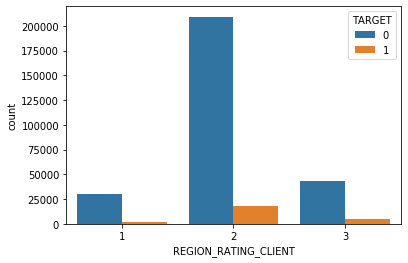

In [64]:
sns.countplot(x="REGION_RATING_CLIENT", hue='TARGET', data=df)

ランク2が0と1の割合が大きい

In [91]:
X = np.array(df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT"]])
y = np.array(df["TARGET"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)

(215257, 3)


In [237]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [238]:
rand = RandomForestClassifier(n_estimators=100)
rand.fit(X_train_scaled, y_train.ravel())
y_pred = rand.predict_proba(X_test_scaled)[:,1]
y_pred

array([0.21, 0.01, 0.08, ..., 0.04, 0.02, 0.19])

In [117]:
roc_auc_score(y_test, y_pred)

0.5204390935621417

精度は変わらず

2. 次に相関が高い特徴量DAYS_ID_PUBLISHを追加

In [69]:
#ローンを申請した際に使った証明書を何日前に更新していたか(負の数になっている)
df["DAYS_ID_PUBLISH"]

0        -2120
1         -291
2        -2531
3        -2437
4        -3458
          ... 
307506   -1982
307507   -4090
307508   -5150
307509    -931
307510    -410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

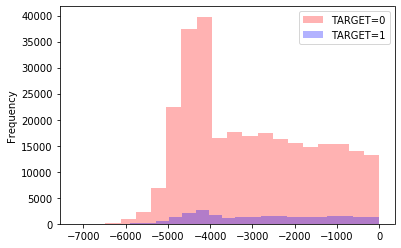

In [73]:
df["DAYS_ID_PUBLISH"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="r" ,label="TARGET=0")
df["DAYS_ID_PUBLISH"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3 ,color="b" ,label="TARGET=1")

plt.legend()
plt.show()

TARGET0と1両方4000日前から5000日前に証明書を更新している

In [86]:
X = np.array(df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH"]])
y = np.array(df["TARGET"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape)

(215257, 4)


In [235]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [236]:
rand = RandomForestClassifier(n_estimators=100)
rand.fit(X_train_scaled, y_train.ravel())
y_pred = rand.predict_proba(X_test_scaled)[:,1]
y_pred

array([0.27, 0.01, 0.07, ..., 0.02, 0.03, 0.17])

In [193]:
roc_auc_score(y_test, y_pred)

0.5206644538064125

精度は変わらず

3. EXT_SOURCEは外部のデータソースからの顧客評価(0～1)とあるので重要そうな特徴量EXT_SOURCE_1追加


In [211]:
df["EXT_SOURCE_1"].isnull().sum()

0

In [209]:
df['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].mean(), inplace=True)

In [210]:
df["EXT_SOURCE_1"].isnull().sum()

0

In [212]:
X = np.array(df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH","EXT_SOURCE_1"]])
y = np.array(df["TARGET"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)

(215257, 5)


In [213]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [214]:
rand = RandomForestClassifier(n_estimators=100)
rand.fit(X_train_scaled, y_train.ravel())
y_pred = rand.predict_proba(X_test_scaled)[:,1]
y_pred

array([0.04      , 0.02      , 0.        , ..., 0.        , 0.16833333,
       0.3       ])

In [215]:
roc_auc_score(y_test, y_pred)

0.5706485457413267

精度上昇　ほかのEXT_SOURCEも追加してみよう

4. EXT_SOURCE_2追加

In [216]:
df["EXT_SOURCE_2"]

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307511, dtype: float64

In [218]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(), inplace=True)

In [219]:
df["EXT_SOURCE_2"].isnull().sum()

0

In [224]:
X = np.array(df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH",
                 "EXT_SOURCE_1","EXT_SOURCE_2"]])
y = np.array(df["TARGET"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)

(215257, 6)


In [225]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [226]:
rand = RandomForestClassifier(n_estimators=100)
rand.fit(X_train_scaled, y_train.ravel())
y_pred = rand.predict_proba(X_test_scaled)[:,1]
y_pred

array([0.03, 0.06, 0.02, ..., 0.02, 0.1 , 0.18])

In [227]:
roc_auc_score(y_test, y_pred)

0.6303774466411569

精度上昇　EXT_SOURCE_3も追加しよう

5. EXT_SOURCE_3追加

In [228]:
df["EXT_SOURCE_3"]

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

In [229]:
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace=True)

In [230]:
df["EXT_SOURCE_2"].isnull().sum()

0

In [231]:
X = np.array(df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH",
                 "EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]])
y = np.array(df["TARGET"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)

(215257, 7)


In [232]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [233]:
rand = RandomForestClassifier(n_estimators=100)
rand.fit(X_train_scaled, y_train.ravel())
y_pred = rand.predict_proba(X_test_scaled)[:,1]
y_pred

array([0.32, 0.  , 0.06, ..., 0.02, 0.04, 0.16])

In [234]:
roc_auc_score(y_test, y_pred)

0.6862622081363423

精度上昇